In [156]:
import IPython
import json
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import bs4
import nltk
import bson
import pymongo
from parsita import *
from parsita.util import constant

In [221]:
import pgn
import sys
import operator

playerList = []
playerNameList = []
piecesWonList = []
piecesAvg = []
piecesLostList = []
piecesAvgLost = []
avgMovesList = []
profitList = []

class Kingdom :
    name: str
    total: int
    piecesWon: int
    piecesLost: int
    avgMoves: float
    piecesSac: int
    avgPieces: float
    avgPiecesLost: float
    profit: int

def parsePGN(fname, total):
    color = "white"
    
    moveCheck = "true"
    counter = 0
    player = Kingdom()
    player.name = fname.replace(".pgn", "")
    player.avgMoves = 0
    player.total = total
    player.piecesWon = 0;
    player.piecesLost = 0;
    playerList.append(player)
    playerNameList.append(player.name)
    
    f = open(fname,'r', -1, 'latin1')
    pgn_text = f.read()
    f.close()
    
    games = pgn.loads(pgn_text)
    for game in games:
        if player.name in game.white:
            color = "white"
        if player.name in game.black:
            color = "black"
        for move in game.moves:
            if "x" in move:
                moveCheck = "false"
                if color == "white":
                    if counter % 2 == 0:
                        player.piecesWon += 1
                    if counter % 2 == 1:
                        player.piecesLost += 1
                if color == "black":
                    if counter % 2 == 1:
                        player.piecesWon += 1
                    if counter % 2 == 0:
                        player.piecesLost += 1
            counter += 1
            if moveCheck == "true":
                player.avgMoves += 1
    
    print(player.name)
    print(player.piecesWon)
    print(player.piecesLost)
    piecesWonList.append(player.piecesWon)
    piecesLostList.append(player.piecesLost)
    player.avgPieces = float(player.piecesWon / player.total)
    player.avgPiecesLost = float(player.piecesLost / player.total)
    piecesAvgLost.append(player.avgPiecesLost)
    piecesAvg.append(player.avgPieces)
    player.avgMoves = float(player.avgMoves / player.total)
    player.profit = player.piecesWon - player.piecesLost
    profitList.append(player.profit)
    print(player.profit)
    avgMovesList.append(player.avgMoves)
    sortedbywins = sorted(playerList, key=operator.attrgetter('piecesWon'))

In [222]:
parsePGN('Kasparov.pgn', 2110)
parsePGN('Carlsen.pgn', 3905)
parsePGN('Alekhine.pgn', 1661)
parsePGN('Anand.pgn', 3895)
parsePGN('Aronian.pgn', 3536)
parsePGN('Botvinnik.pgn', 891)
parsePGN('Capablanca.pgn', 597)
parsePGN('Caruana.pgn', 2811)
parsePGN('Ding.pgn', 1622)
parsePGN('Firouzja.pgn', 1748)
parsePGN('Fischer.pgn', 827)
parsePGN('Giri.pgn', 2556)
parsePGN('Grischuk.pgn', 3754)
parsePGN('Mamedyarov.pgn', 3540)
parsePGN('Nakamura.pgn', 4308)
parsePGN('Nepomniachtchi.pgn', 2818)
parsePGN('PolgarJ.pgn', 1825)
parsePGN('So.pgn', 2512)
parsePGN('Tal.pgn', 2431)

Kasparov
17042
16977
65
Carlsen
36689
36543
146
Alekhine
14250
14202
48
Anand
32277
32281
-4
Aronian
31774
31779
-5
Botvinnik
7349
7361
-12
Capablanca
4937
4964
-27
Caruana
25757
25651
106
Ding
14871
14828
43
Firouzja
16213
16165
48
Fischer
7238
7183
55
Giri
23190
23169
21
Grischuk
33060
32936
124
Mamedyarov
31048
31092
-44
Nakamura
39719
39621
98
Nepomniachtchi
25729
25728
1
PolgarJ
16112
16143
-31
So
22553
22621
-68
Tal
18237
18176
61


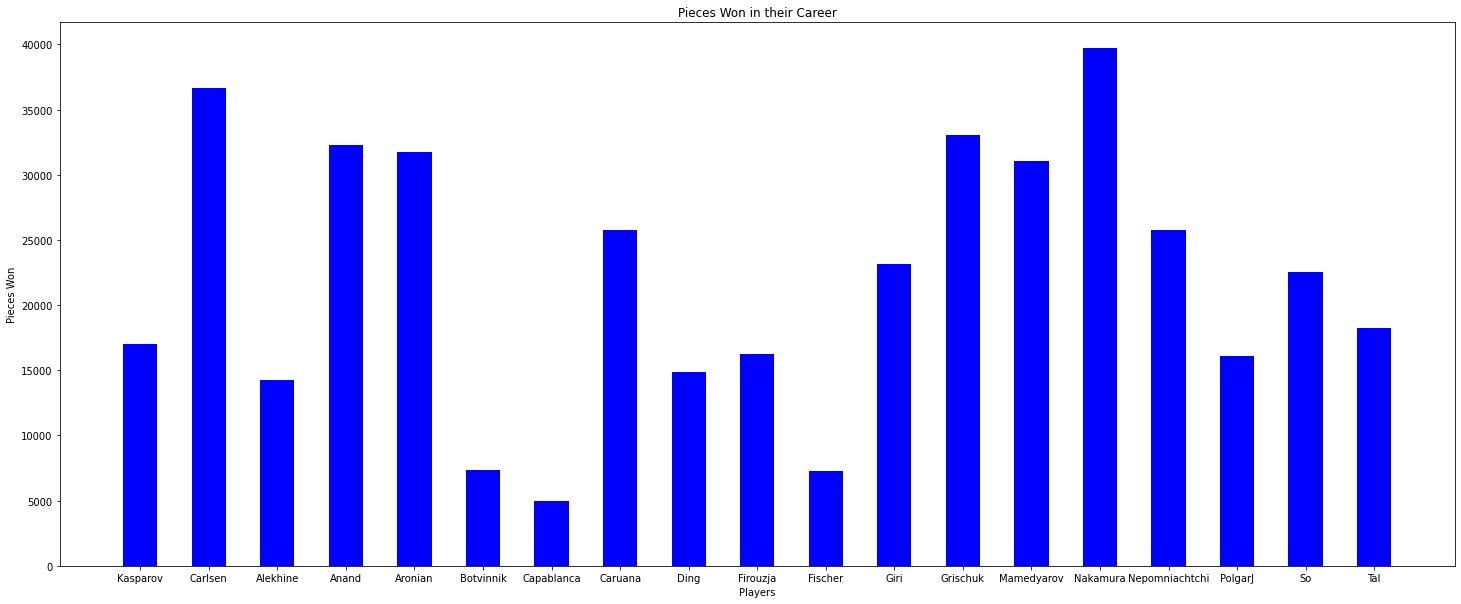

In [211]:
fig = plt.figure(figsize = (25, 10))

plt.bar(playerNameList, piecesWonList, color = 'blue', width = 0.5)
plt.xlabel("Players")
plt.ylabel("Pieces Won")
plt.title("Pieces Won in their Career")
plt.show()

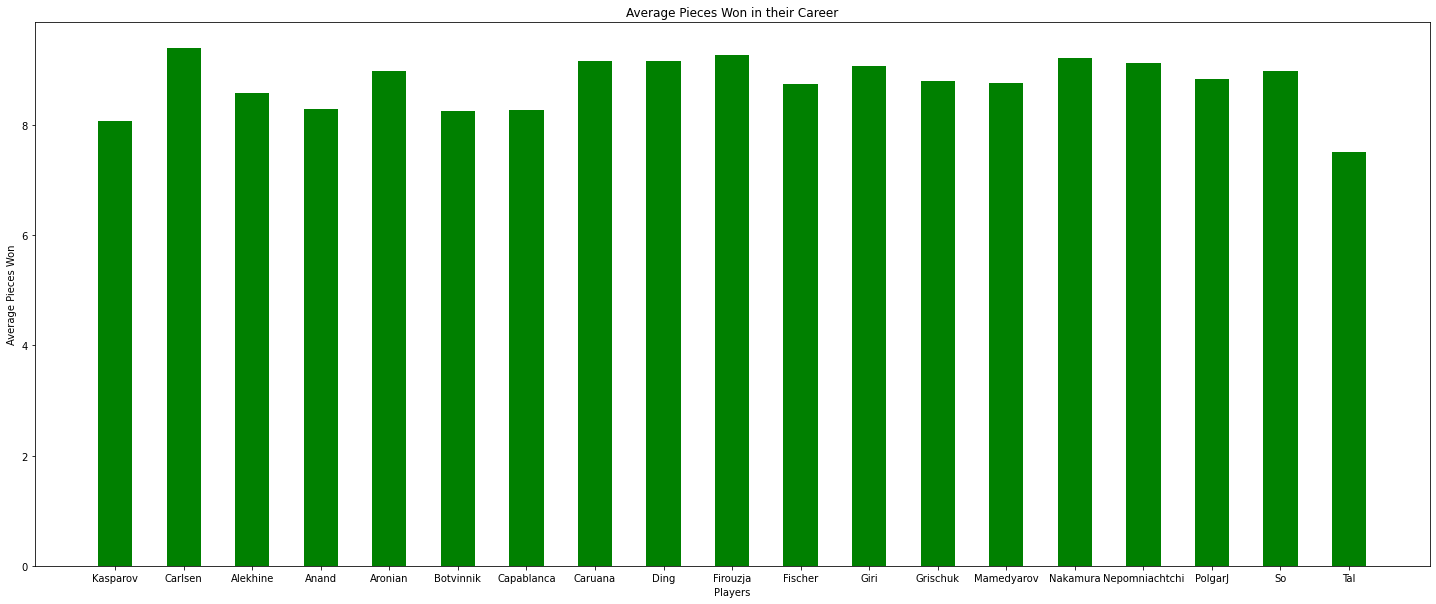

In [212]:
fig = plt.figure(figsize = (25, 10))

plt.bar(playerNameList, piecesAvg, color = 'green', width = 0.5)
plt.xlabel("Players")
plt.ylabel("Average Pieces Won")
plt.title("Average Pieces Won in their Career")
plt.show()

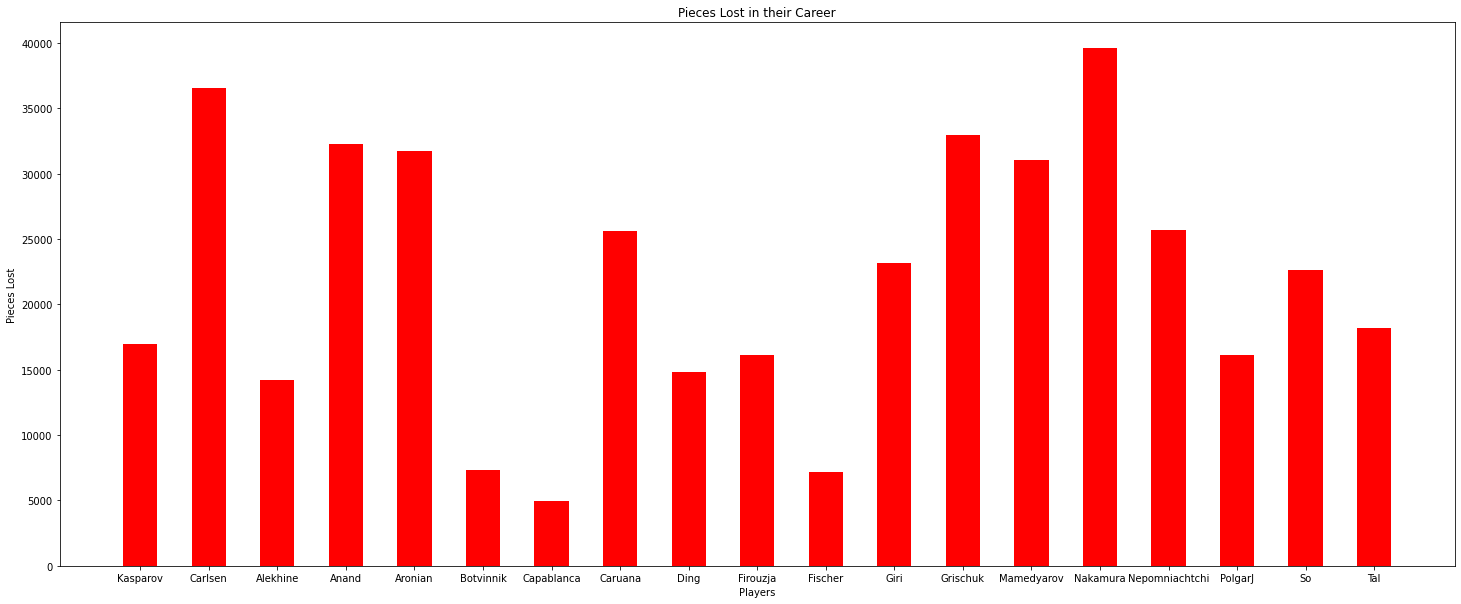

In [213]:
fig = plt.figure(figsize = (25, 10))

plt.bar(playerNameList, piecesLostList, color = 'red', width = 0.5)
plt.xlabel("Players")
plt.ylabel("Pieces Lost")
plt.title("Pieces Lost in their Career")
plt.show()

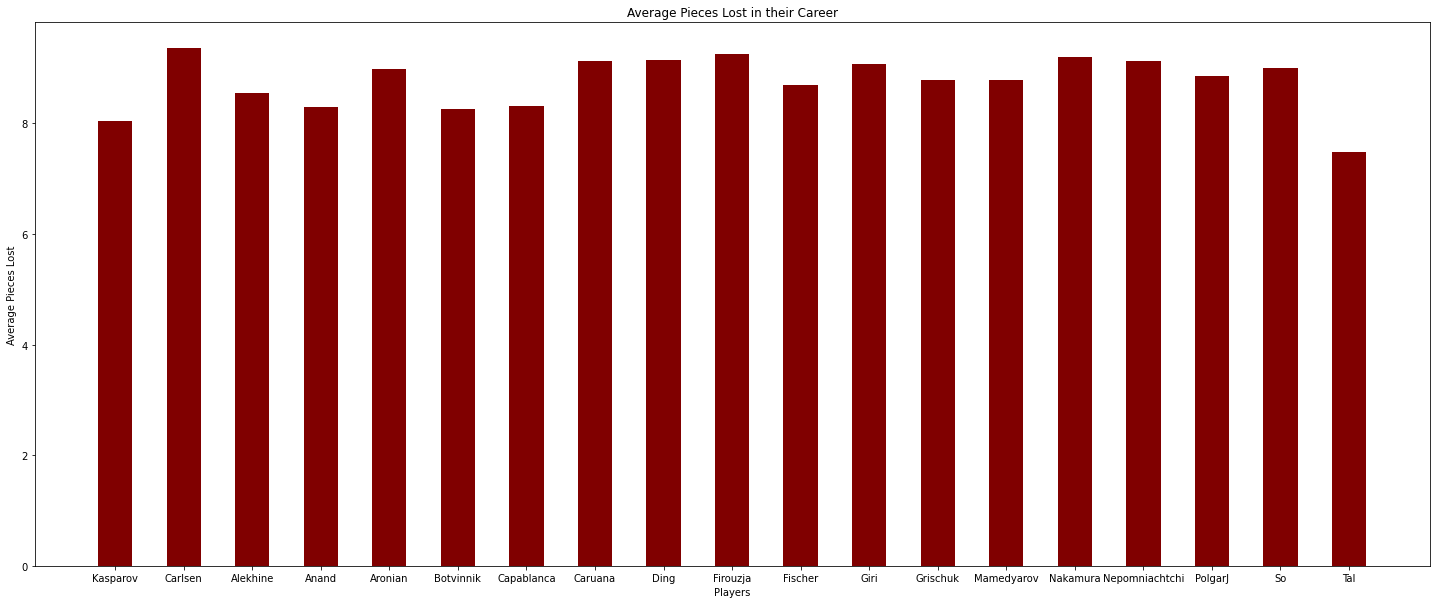

In [214]:
fig = plt.figure(figsize = (25, 10))

plt.bar(playerNameList, piecesAvgLost, color = 'maroon', width = 0.5)
plt.xlabel("Players")
plt.ylabel("Average Pieces Lost")
plt.title("Average Pieces Lost in their Career")
plt.show()

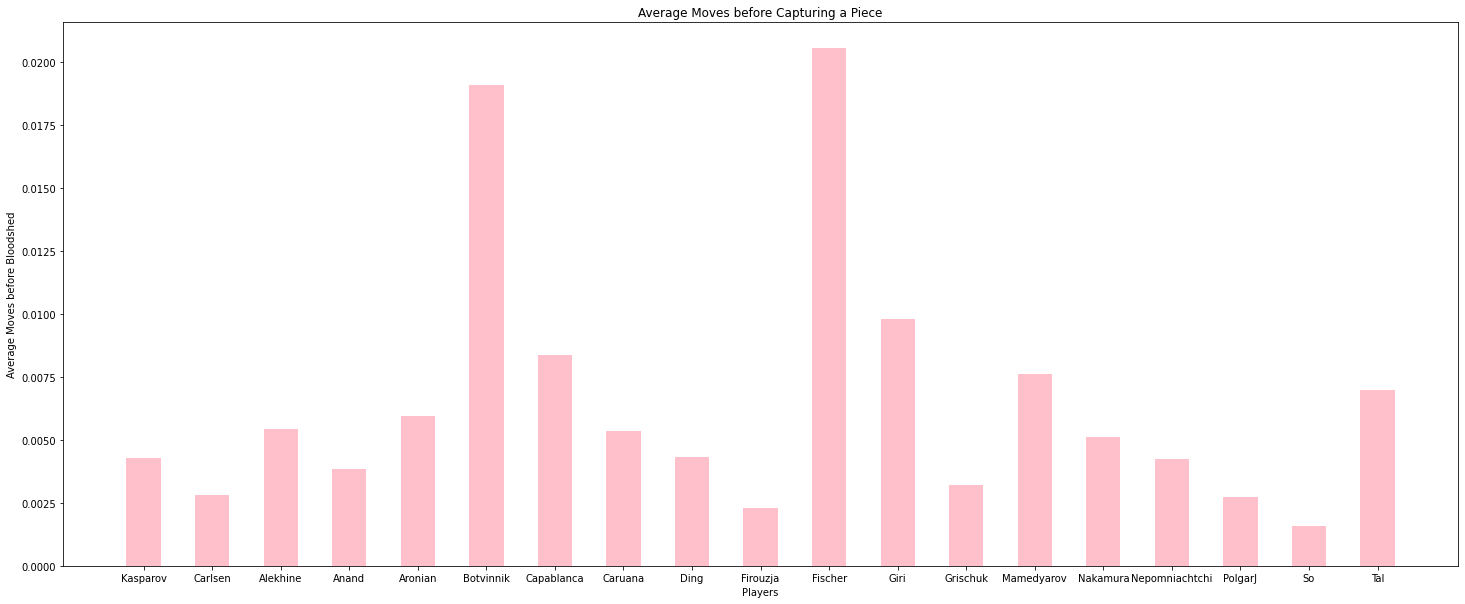

In [215]:
fig = plt.figure(figsize = (25, 10))

plt.bar(playerNameList, avgMovesList, color = 'pink', width = 0.5)
plt.xlabel("Players")
plt.ylabel("Average Moves before Bloodshed")
plt.title("Average Moves before Capturing a Piece")
plt.show()

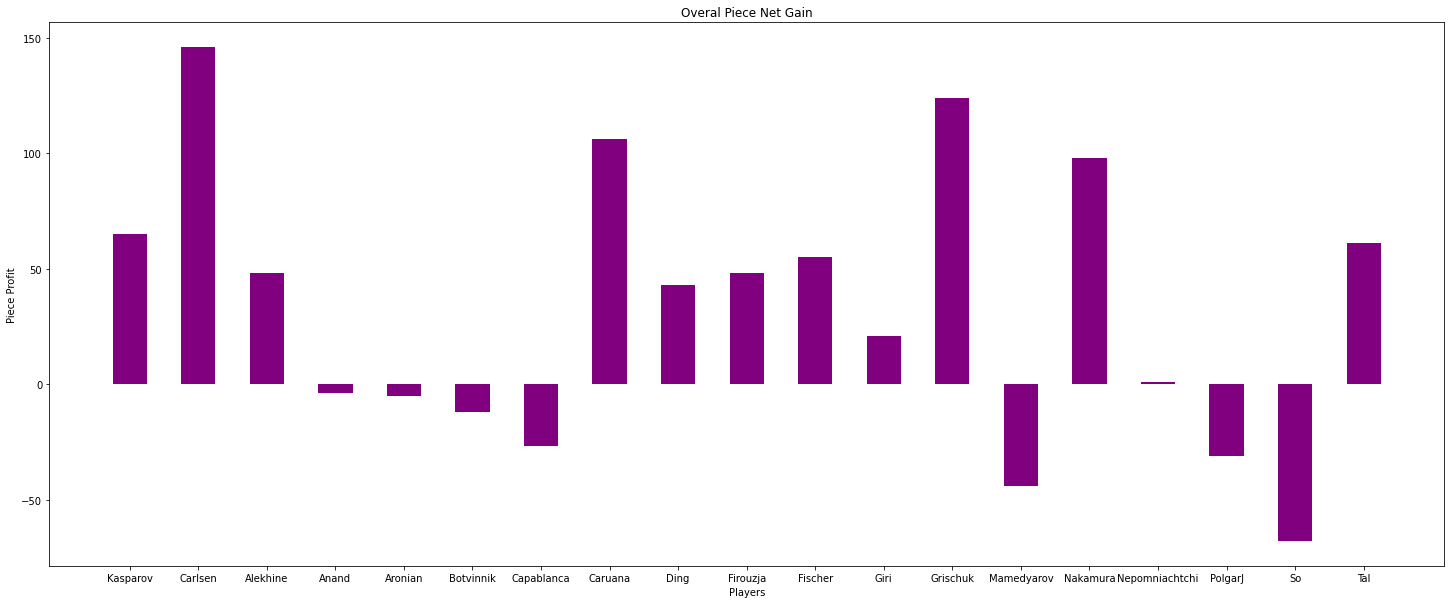

In [220]:
fig = plt.figure(figsize = (25, 10))

plt.bar(playerNameList, profitList, color = 'purple', width = 0.5)
plt.xlabel("Players")
plt.ylabel("Piece Profit")
plt.title("Overal Piece Net Gain")
plt.show()